# Objective and Goals:
#### We will try to build a deep learning model to accurately predict whether or not the patients in the dataset have diabetes or not?'''

# Dataset Description:
""" The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. • Pregnancies: Number of times pregnant • Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test • BloodPressure: Diastolic blood pressure (mm Hg) • SkinThickness: Triceps skin fold thickness (mm) • Insulin: 2-Hour serum insulin (mu U/ml) • BMI: Body mass index (weight in kg/(height in m)^2) • DiabetesPedigreeFunction: Diabetes pedigree function • Age: Age (years) 
##### • Outcome: Class variable (0 or 1)"""

### Importing Libraries

In [1]:
import numpy as np # for numerical computing 
import pandas as pd # for data preprocessing and data analysis 
import matplotlib.pyplot as plt # for data visulization
import tensorflow as tf # open source library useing for building models 
from tensorflow.keras import models,utils,layers,optimizers
from tensorflow.keras.optimizers import Adam

# Loading Dataset...

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
#show first five row of the record 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking the shape of the data
data.shape

(768, 9)

In [5]:
#check the columns of the data set 
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.info() #info function give information about Dataframe including indexing , datatype and memory usage and non null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#checking if any null value exist or not in data set
data.isnull().values.any()

False

In [9]:
#visuliazing the outcome variable 
outcome = data.Outcome.value_counts()

In [10]:
outcome

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:title={'center':'Outcome'}, ylabel='Outcome'>

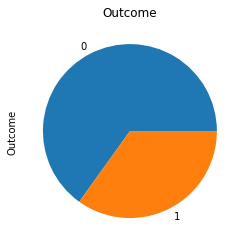

In [11]:
#ploting the pie chart 
outcome.plot(kind="pie",title="Outcome")

<AxesSubplot:title={'center':'Outcome'}>

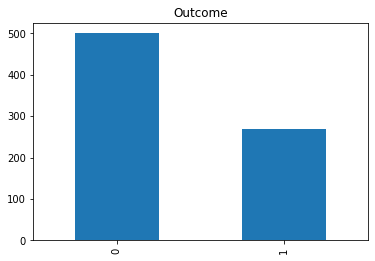

In [12]:
#ploting the bar chart 
outcome.plot(kind="bar",title="Outcome")

## spliting dataset

In [13]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y , test_size=.2, train_size=.8)

# Building the Model 

In [16]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(X.shape[1],)))
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))
# compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=["acc"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


# Traing the Model

In [18]:
history = model.fit(X_Train,Y_Train,epochs=600,batch_size=100)

Epoch 1/600
7/7 [==============================] - 0s 1ms/step - loss: 1.8514 - acc: 0.6173
Epoch 2/600
7/7 [==============================] - 0s 1ms/step - loss: 0.9038 - acc: 0.6547
Epoch 3/600
7/7 [==============================] - 0s 1000us/step - loss: 1.1549 - acc: 0.5749
Epoch 4/600
7/7 [==============================] - 0s 1ms/step - loss: 0.7916 - acc: 0.6531
Epoch 5/600
7/7 [==============================] - 0s 833us/step - loss: 0.9003 - acc: 0.6221
Epoch 6/600
7/7 [==============================] - 0s 1ms/step - loss: 0.8319 - acc: 0.6759
Epoch 7/600
7/7 [==============================] - 0s 1ms/step - loss: 0.8754 - acc: 0.6303
Epoch 8/600
7/7 [==============================] - 0s 1000us/step - loss: 0.8667 - acc: 0.6401
Epoch 9/600
7/7 [==============================] - 0s 1ms/step - loss: 0.8416 - acc: 0.6580
Epoch 10/600
7/7 [==============================] - 0s 832us/step - loss: 0.7805 - acc: 0.6645
Epoch 11/600
7/7 [==============================] - 0s 1ms/step - los

7/7 [==============================] - 0s 833us/step - loss: 0.6817 - acc: 0.7362
Epoch 89/600
7/7 [==============================] - 0s 832us/step - loss: 0.5827 - acc: 0.7378
Epoch 90/600
7/7 [==============================] - 0s 1ms/step - loss: 0.6261 - acc: 0.7101
Epoch 91/600
7/7 [==============================] - 0s 833us/step - loss: 0.5088 - acc: 0.7524
Epoch 92/600
7/7 [==============================] - 0s 1ms/step - loss: 0.6617 - acc: 0.7329
Epoch 93/600
7/7 [==============================] - 0s 834us/step - loss: 0.7782 - acc: 0.6694
Epoch 94/600
7/7 [==============================] - 0s 1ms/step - loss: 0.5358 - acc: 0.7329
Epoch 95/600
7/7 [==============================] - 0s 833us/step - loss: 0.5890 - acc: 0.7248
Epoch 96/600
7/7 [==============================] - 0s 1000us/step - loss: 0.6046 - acc: 0.7085
Epoch 97/600
7/7 [==============================] - 0s 833us/step - loss: 0.6062 - acc: 0.7134
Epoch 98/600
7/7 [==============================] - 0s 999us/step - 

7/7 [==============================] - 0s 833us/step - loss: 0.5328 - acc: 0.7248
Epoch 175/600
7/7 [==============================] - 0s 1000us/step - loss: 0.5206 - acc: 0.7524
Epoch 176/600
7/7 [==============================] - 0s 1ms/step - loss: 0.5219 - acc: 0.7427
Epoch 177/600
7/7 [==============================] - 0s 1ms/step - loss: 0.5741 - acc: 0.7394
Epoch 178/600
7/7 [==============================] - 0s 1ms/step - loss: 0.5455 - acc: 0.7590
Epoch 179/600
7/7 [==============================] - 0s 833us/step - loss: 0.4987 - acc: 0.7524
Epoch 180/600
7/7 [==============================] - 0s 1ms/step - loss: 0.5569 - acc: 0.7199
Epoch 181/600
7/7 [==============================] - 0s 834us/step - loss: 0.4953 - acc: 0.7720
Epoch 182/600
7/7 [==============================] - 0s 1ms/step - loss: 0.5213 - acc: 0.7590
Epoch 183/600
7/7 [==============================] - 0s 834us/step - loss: 0.5324 - acc: 0.7541
Epoch 184/600
7/7 [==============================] - 0s 999us/s

7/7 [==============================] - 0s 1000us/step - loss: 0.4697 - acc: 0.7899
Epoch 260/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4981 - acc: 0.7524
Epoch 261/600
7/7 [==============================] - 0s 833us/step - loss: 0.5430 - acc: 0.7606
Epoch 262/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4516 - acc: 0.7834
Epoch 263/600
7/7 [==============================] - 0s 833us/step - loss: 0.5269 - acc: 0.7671
Epoch 264/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4696 - acc: 0.7948
Epoch 265/600
7/7 [==============================] - 0s 833us/step - loss: 0.5322 - acc: 0.7492
Epoch 266/600
7/7 [==============================] - 0s 998us/step - loss: 0.4693 - acc: 0.7638
Epoch 267/600
7/7 [==============================] - 0s 1000us/step - loss: 0.5051 - acc: 0.7541
Epoch 268/600
7/7 [==============================] - 0s 1000us/step - loss: 0.5444 - acc: 0.7362
Epoch 269/600
7/7 [==============================] - 0s 8

7/7 [==============================] - 0s 1000us/step - loss: 0.4603 - acc: 0.7997
Epoch 345/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4369 - acc: 0.7932
Epoch 346/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4375 - acc: 0.7834
Epoch 347/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4133 - acc: 0.8078
Epoch 348/600
7/7 [==============================] - 0s 833us/step - loss: 0.5081 - acc: 0.7752
Epoch 349/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4622 - acc: 0.7752
Epoch 350/600
7/7 [==============================] - 0s 833us/step - loss: 0.4280 - acc: 0.8029
Epoch 351/600
7/7 [==============================] - 0s 998us/step - loss: 0.5098 - acc: 0.7850
Epoch 352/600
7/7 [==============================] - 0s 2ms/step - loss: 0.4761 - acc: 0.7752
Epoch 353/600
7/7 [==============================] - 0s 1000us/step - loss: 0.4107 - acc: 0.8094
Epoch 354/600
7/7 [==============================] - 0s 833us/

7/7 [==============================] - 0s 833us/step - loss: 0.3880 - acc: 0.8127
Epoch 430/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4101 - acc: 0.8094
Epoch 431/600
7/7 [==============================] - 0s 833us/step - loss: 0.4237 - acc: 0.7980
Epoch 432/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4806 - acc: 0.7801
Epoch 433/600
7/7 [==============================] - 0s 833us/step - loss: 0.3857 - acc: 0.8208
Epoch 434/600
7/7 [==============================] - 0s 1000us/step - loss: 0.4138 - acc: 0.8274
Epoch 435/600
7/7 [==============================] - 0s 1000us/step - loss: 0.4162 - acc: 0.8013
Epoch 436/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4095 - acc: 0.8062
Epoch 437/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4704 - acc: 0.7997
Epoch 438/600
7/7 [==============================] - 0s 833us/step - loss: 0.4247 - acc: 0.8046
Epoch 439/600
7/7 [==============================] - 0s 1ms/

7/7 [==============================] - 0s 1000us/step - loss: 0.3802 - acc: 0.8322
Epoch 516/600
7/7 [==============================] - 0s 1ms/step - loss: 0.3573 - acc: 0.8241
Epoch 517/600
7/7 [==============================] - 0s 1000us/step - loss: 0.3970 - acc: 0.8127
Epoch 518/600
7/7 [==============================] - 0s 1ms/step - loss: 0.3610 - acc: 0.8388
Epoch 519/600
7/7 [==============================] - 0s 833us/step - loss: 0.3425 - acc: 0.8371
Epoch 520/600
7/7 [==============================] - 0s 1ms/step - loss: 0.3911 - acc: 0.8111
Epoch 521/600
7/7 [==============================] - 0s 1ms/step - loss: 0.4177 - acc: 0.8078
Epoch 522/600
7/7 [==============================] - 0s 1ms/step - loss: 0.3302 - acc: 0.8485
Epoch 523/600
7/7 [==============================] - 0s 834us/step - loss: 0.3675 - acc: 0.8355
Epoch 524/600
7/7 [==============================] - 0s 1ms/step - loss: 0.3658 - acc: 0.8388
Epoch 525/600
7/7 [==============================] - 0s 833us/st

7/7 [==============================] - 0s 1000us/step - loss: 0.3097 - acc: 0.8599


In [19]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


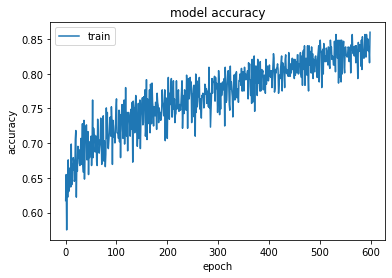

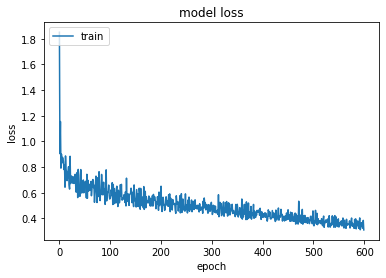

In [20]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [21]:
# from sklearn.preprocessing import fit_transform #Imputer

# #fill_values = Imputer(missing_values=0, strategy="mean", axis=0)

# X_test = fit_transform(X_test)
# #X_test = fill_values.fit_transform(X_test)

In [22]:
# Evaluating the model 
test_loss, test_acc = model.evaluate(X_Test,Y_Test,verbose=0,batch_size=100)

In [23]:
print("test accuracy->",test_acc)
print("test loss->",test_loss)

test accuracy-> 0.701298713684082
test loss-> 1.0093320608139038
